# black-box regression results

Generates figures comparing performance on the black-box regression problems.

In [1]:
# !pip install pandas==1.5.1

In [2]:
symbolic_algs = [
    'AFP', 
    'AFP_FE',
    'BSR',
    'DSR',
    'FFX',
    'FEAT',
    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',
    'AIFeynman',

    'Brush',
    'Brush wo split',
    'Brush (D-UCB1)',
    'Brush (C-D-UCB1)',
    'Brush (D-TS)',
    'Brush (C-D-TS)',
    'Brush wo split (D-UCB1)',
    
    # Fixed labels
    'Brush w/ split (no MAB)',

    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # short fixed labels
    'Brush_0',
    'Brush+S',
    'Brush+M',
    'Brush+SM',
]
nongp_algs = [
    'BSR',
    'DSR',
    'AIFeynman'
]
gp_algs = [
    'AFP', 
    'AFP_FE',
    'FFX',
    'FEAT',
    'EPLEX',
    'GP-GOMEA',
    'gplearn',
    'ITEA', 
    'MRGP', 
    'Operon',
    'SBP-GP',

    'Brush',
    'Brush wo split',
    'Brush (D-UCB1)',
    'Brush (C-D-UCB1)',
    'Brush (D-TS)',
    'Brush (C-D-TS)',
    'Brush wo split (D-UCB1)',
    
    # Fixed labels
    'Brush w/ split (no MAB)',

    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # short fixed labels
    'Brush_0',
    'Brush+S',
    'Brush+M',
    'Brush+SM',
]

In [3]:
import pandas as pd
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('pdf', fonttype=42)
matplotlib.rc('ps', fonttype=42)

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

import os
sns.set(font_scale=1.25, style='whitegrid')
sns.set(palette='magma')

rdir = '../results_blackbox/'
pstreedir = '../results_blackbox_pstree/'
figdir = '../paper/'
datadir = '../datasets/pmlb/datasets/'
print('figdir:',figdir)

def save(name='tmp',h=None):
    name = name.strip().replace(' ','-').replace('%','pct')
    if h == None:
        h = plt.gcf()
    h.tight_layout()
    print('saving',figdir+'/'+name+'.pdf')
    if not os.path.exists(figdir):
        os.makedirs(figdir)
    plt.savefig(figdir+'/'+name+'.pdf', bbox_inches='tight')
    plt.savefig(figdir+'/'+name+'.svg', bbox_inches='tight')

figdir: ../paper/


# read data from feather

In [4]:
##########
# load results
##########
df_results = pd.read_feather('../results/black-box_results_srbench.feather')

# df_results = pd.concat([pd.read_feather('../results/black-box_results_brush_500_dom.feather'), df_results], axis=0)
# df_results = pd.concat([pd.read_feather('../results/black-box_results_brush_500.feather'), df_results], axis=0)
# df_results = pd.concat([pd.read_feather('../results/black-box_results_brush_250.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/black-box_results_brush-cpp.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/black-box_results_pstree.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/black-box_results_tpsr.feather'), df_results], axis=0)
df_results = pd.concat([pd.read_feather('../results/black-box_results_e2et.feather'), df_results], axis=0)

df_results = pd.concat([pd.read_feather('../results/black-box_results_dso2.feather'), df_results], axis=0)
# df_results = pd.concat([pd.read_feather('../results/black-box_results_udsr_from_parfam.feather'), df_results], axis=0)

# df_results.reset_index()

df_results['algorithm'] = df_results['algorithm'].str.replace(r'^Brush$', r'Brush w/ split (no MAB)', regex=True)
df_results['algorithm'] = df_results['algorithm'].str.replace(r'^Brush wo split$', r'Brush w/o split (no MAB)', regex=True)
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush wo', r'Brush w/o'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush (', r'Brush w/ split ('))

# Short labels
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/o split (no MAB)',r'$Brush_0$'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (no MAB)','Brush+S'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/o split (D-UCB1)','Brush+M'))
df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (D-UCB1)','Brush+SM'))

# Visualize different mabs.
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush+SM','Brush+M (D-UCB1)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (C-D-UCB1)','Brush+M (C-D-UCB1)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (D-TS)','Brush+M (D-TS)'))
# df_results['algorithm'] = df_results['algorithm'].apply(lambda x: x.replace('Brush w/ split (C-D-TS)','Brush+M (C-D-TS)'))

# Removing mislabeled datasets (these are clf, but PMLB v1.0 had it as regr)
df_results = df_results[ ~df_results["dataset"].isin(["banana", "titanic"]) ]

print('mean trial count:')
print(df_results.groupby('algorithm')['dataset'].count().sort_values()
      / df_results.dataset.nunique())

mean trial count:
algorithm
uDSR                  6.581967
AIFeynman             7.688525
TPSR+E2E              9.073770
Brush-cpp             9.467213
Brush-cpp-dynamic     9.508197
Brush-cpp-thompson    9.540984
MRGP                  9.745902
FEAT                  9.827869
XGB                   9.836066
SBP-GP                9.836066
RandomForest          9.836066
PS-Tree               9.836066
Operon                9.836066
MLP                   9.836066
Linear                9.836066
LGBM                  9.836066
AFP                   9.836066
ITEA                  9.836066
gplearn               9.836066
FFX                   9.836066
EPLEX                 9.836066
DSR                   9.836066
BSR                   9.836066
AdaBoost              9.836066
AFP_FE                9.836066
KernelRidge           9.836066
GP-GOMEA              9.836066
E2E                   9.868852
Name: dataset, dtype: float64


In [5]:
df_results['dataset'].nunique()

122

In [6]:
df_results.sample(2)

,dataset,algorithm,random_state,training time (s),symbolic_model,mse_test,mae_test,r2_test,model_size,params_str,training time (hr),r2_zero_test,friedman_dataset,symbolic_alg
10607,583_fri_c1_1000_50,AFP,15795,3343.608380,(-0.214-sin((x_0-(sin(sin((0.611*(sin((-0.298*...,0.355046,0.476668,0.665205,52,"{'AR': False, 'AR_lookahead': False, 'AR_na': ...",0.928780,0.665205,True,True
11086,586_fri_c3_1000_25,gplearn,15795,24521.956646,"add(sin(add(sin(sin(sin(sin(X3)))), mul(log(mu...",0.410689,0.502995,0.560857,26,"{'generations': 1000, 'init_method': 'half and...",6.811655,0.560857,True,True


In [7]:
df_results['algorithm'].value_counts()

E2E                   1204
AFP_FE                1200
Linear                1200
SBP-GP                1200
RandomForest          1200
Operon                1200
MLP                   1200
LGBM                  1200
KernelRidge           1200
ITEA                  1200
gplearn               1200
GP-GOMEA              1200
FFX                   1200
XGB                   1200
EPLEX                 1200
DSR                   1200
BSR                   1200
AFP                   1200
AdaBoost              1200
PS-Tree               1200
FEAT                  1199
MRGP                  1189
Brush-cpp-thompson    1164
Brush-cpp-dynamic     1160
Brush-cpp             1155
TPSR+E2E              1107
AIFeynman              938
uDSR                   803
Name: algorithm, dtype: int64

In [8]:
# ignoring new datasets from PMLB that hasnt been benchmarked with other methods yet
# df_results[['algorithm', 'dataset']].value_counts().unstack().sum(axis=0).sort_values()

print(df_results.shape)
df_results = df_results[ ~df_results["dataset"].isin([
                                                        "nikuradse_2",
                                                        "nikuradse_1"
]) ]

print(df_results.shape)


(32719, 14)
(32603, 14)


In [9]:
# removing specific models (for results reporting --- there is several papers using these results)

print(df_results.shape)
df_results = df_results[ ~df_results["algorithm"].isin([
    # Comment out which you want to use in the plots
    
    # 'Brush_0',
    'Brush+S',
    # 'Brush+M',
    'Brush+SM',

    'Brush w/ split (no MAB)',
    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    # "uDSR",
    # "E2E",
    # "TPSR+E2E",
    # "NeSymRes 10M",
    # "NeSymRes 100M",
]) ]

print(df_results.shape)

(32603, 14)
(32603, 14)


## summarize results by dataset, including ranking

In [10]:
df_results2 = df_results.merge(df_results.groupby('dataset')['algorithm'].nunique().reset_index(),
                              on='dataset',suffixes=('','_count'))
display(df_results2)
                                       
# rankings per trial per dataset
for col in [c for c in df_results2.columns if c.endswith('test') or c.endswith('size')]:
    print(col)
    ascending = 'r2' not in col
    df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x: 
                                                                              round(x,3).rank(
                                                                              ascending=ascending))
    
df_sum = df_results2.groupby(['algorithm','dataset'],as_index=False).median()
df_sum['rmse_test'] = df_sum['mse_test'].apply(np.sqrt)
df_sum['log_mse_test'] = df_sum['mse_test'].apply(lambda x: np.log(1+x))
df_results = df_results2

# rankings and normalized scores per dataset
for col in [c for c in df_sum.columns if c.endswith('test') or c.endswith('size')]:
    ascending = 'r2' not in col
    df_sum[col+'_rank']=df_sum.groupby(['dataset'])[col].apply(lambda x: 
                                                                        round(x,3).rank(ascending=ascending)
                                                                  )
    df_sum[col+'_norm'] = df_sum.groupby('dataset')[col].apply(lambda x: (x-x.min())/(x.max()-x.min()))
    
###################
# save summary data
###################
df_sum.to_csv('../results/results_black-box_summary.csv.gz',compression='gzip',index=False)

df_sum

,dataset,algorithm,random_state,training time (s),symbolic_model,mse_test,mae_test,r2_test,model_size,params_str,training time (hr),r2_zero_test,friedman_dataset,symbolic_alg,algorithm_count
0,1027_ESL,uDSR,14423,1832.207920,-0.081851*x1**3 + 0.0367636*x1**2*x2 + 0.21581...,0.296874,0.399164,0.838687,12,"{'config': {'experiment': {'logdir': None, 'ex...",0.508947,0.838687,False,False,28
1,1027_ESL,uDSR,15795,1806.268146,-0.0305862*x1**3 - 0.0164517*x1**2*x2 + 0.1409...,0.284931,0.394580,0.861846,11,"{'config': {'experiment': {'logdir': None, 'ex...",0.501741,0.861846,False,False,28
2,1027_ESL,uDSR,16850,2408.066985,-0.0499683*x1**3 + 0.00294064*x1**2*x2 + 0.116...,0.261208,0.400174,0.882798,8,"{'config': {'experiment': {'logdir': None, 'ex...",0.668907,0.882798,False,False,28
3,1027_ESL,uDSR,21962,1847.801360,x2*(-cos(x3 - x4) + (-0.0670866*x1**3 + 0.0177...,0.838478,0.454631,0.581829,10,"{'config': {'experiment': {'logdir': None, 'ex...",0.513278,0.581829,False,False,28
4,1027_ESL,uDSR,23654,1836.508253,0.00290818*x1**3 + 0.0304712*x1**2*x2 + 0.1171...,0.353052,0.417139,0.823994,8,"{'config': {'experiment': {'logdir': None, 'ex...",0.510141,0.823994,False,False,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32598,706_sleuth_case1202,XGB,23654,127.014718,not implemented,3931.867876,45.474855,0.597039,1198,"{'objective': 'reg:squarederror', 'base_score'...",0.035282,0.597039,False,False,27
32599,706_sleuth_case1202,XGB,29802,125.869516,not implemented,3907.973191,52.728085,0.542219,162,"{'objective': 'reg:squarederror', 'base_score'...",0.034964,0.542219,False,False,27
32600,706_sleuth_case1202,XGB,5390,128.772665,not implemented,2414.657146,39.690572,0.622513,160,"{'objective': 'reg:squarederror', 'base_score'...",0.035770,0.622513,False,False,27
32601,706_sleuth_case1202,XGB,6265,130.969166,not implemented,2285.051540,38.442077,0.697314,506,"{'objective': 'reg:squarederror', 'base_score'...",0.036380,0.697314,False,False,27


mse_test


/tmp/ipykernel_3314807/1819385102.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x:


mae_test


/tmp/ipykernel_3314807/1819385102.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x:


r2_test


/tmp/ipykernel_3314807/1819385102.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x:


model_size


/tmp/ipykernel_3314807/1819385102.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x:


r2_zero_test


/tmp/ipykernel_3314807/1819385102.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_results2[col+'_rank_per_trial']=df_results2.groupby(['dataset','random_state'])[col].apply(lambda x:
/tmp/ipykernel_3314807/1819385102.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = df_results2.groupby(['algorithm','dataset'],as_index=False).median()
/tmp/ipykernel_3314807/1819385102.py:21: FutureWarning: Not prepending group keys to the result in

,algorithm,dataset,random_state,training time (s),mse_test,mae_test,r2_test,model_size,training time (hr),r2_zero_test,...,r2_test_rank,r2_test_norm,model_size_rank,model_size_norm,r2_zero_test_rank,r2_zero_test_norm,rmse_test_rank,rmse_test_norm,log_mse_test_rank,log_mse_test_norm
0,AFP,1027_ESL,13879.5,1210.966865,0.365049,0.442612,0.830930,20.5,0.336380,0.830930,...,19.0,0.922184,7.0,0.000770,19.0,0.922184,19.0,0.139514,19.0,0.123830
1,AFP,1028_SWD,13879.5,3017.658321,0.438023,0.538419,0.314517,47.0,0.838238,0.314517,...,19.0,0.817773,10.0,0.000378,19.0,0.788709,22.0,0.216281,22.0,0.208446
2,AFP,1029_LEV,13879.5,2622.206193,0.433124,0.508817,0.521904,23.5,0.728391,0.521904,...,19.0,0.939429,7.5,0.000229,19.0,0.934869,18.0,0.075124,18.5,0.070675
3,AFP,1030_ERA,13879.5,3007.024177,2.496171,1.299746,0.358716,36.5,0.835284,0.358716,...,20.0,0.919178,12.0,0.003315,20.0,0.917586,19.0,0.063796,19.0,0.067865
4,AFP,1089_USCrime,13879.5,590.939726,549.423049,18.823004,0.639671,25.0,0.164150,0.639671,...,20.0,0.884191,7.0,0.001007,20.0,0.780937,18.0,0.166995,18.0,0.254976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,uDSR,665_sleuth_case2002,16322.5,2021.250424,391.614800,13.058829,-3.618476,17.5,0.561458,0.000000,...,28.0,0.000000,6.0,0.002130,25.5,0.000000,28.0,1.000000,28.0,1.000000
3309,uDSR,666_rmftsa_ladata,16322.5,3536.686073,63.808076,4.446734,-5.842570,10.0,0.982413,0.000000,...,26.0,0.444786,2.0,0.000000,26.5,0.000000,26.0,0.703212,26.0,0.834339
3310,uDSR,678_visualizing_environmental,16322.5,1750.071732,21.404371,3.535604,-0.549328,13.5,0.486131,0.000000,...,26.0,0.762223,6.0,0.002440,24.5,0.000000,26.0,0.472590,26.0,0.579430
3311,uDSR,690_visualizing_galaxy,16322.5,1522.833032,279.055854,12.346911,0.967045,12.5,0.423009,0.967045,...,9.5,0.976966,3.0,0.000029,9.5,0.976966,8.0,0.042515,8.5,0.076396


In [11]:
pd.__version__

'1.5.1'

# plot comparisons

In [12]:

def compare(df_compare, x='r2_test',y='algorithm', row=None, col=None, scale=None, xlim=[],**kwargs):
    plt.figure()
    order = df_compare.groupby(y)[x].median().sort_values(ascending=False).index
    if scale=='log' and len(xlim)>0 and xlim[0] == 0:
        df_compare.loc[:,x] += 1
        xlim[0] = 1
        xnew = '1 + '+x
        df_compare=df_compare.rename(columns={x:xnew})
        x = xnew
    
    sns.catplot(data=df_compare, 
                kind='point',
#                 color='w',
                y=y,
                x=x,
                order=order,
                fliersize=0,
#                 notch=True,
                row=row,
                col=col,
                palette='flare_r',
                **kwargs
               )
    plt.ylabel('')
    if len(xlim)>0:
        plt.xlim(xlim[0],xlim[1])
    if scale:
        plt.gca().set_xscale(scale)
    
    save(name='_'.join(['cat-boxplot',x + '-by-'+ y]) )
    if col:
        save(name='_'.join(['cat-boxplot',x + '-by-'+ y] + [col]) )

## point plot comparisons on PMLB

Index(['PS-Tree', 'Brush-cpp', 'Operon', 'Brush-cpp-dynamic', 'SBP-GP',
       'Brush-cpp-thompson', 'FEAT', 'EPLEX', 'XGB', 'LGBM', 'GP-GOMEA',
       'AdaBoost', 'RandomForest', 'ITEA', 'AFP_FE', 'AFP', 'FFX',
       'KernelRidge', 'uDSR', 'gplearn', 'DSR', 'MRGP', 'MLP', 'Linear',
       'TPSR+E2E', 'E2E', 'BSR', 'AIFeynman'],
      dtype='object', name='algorithm')


,r2_test,training time (s),model_size
0,0.830930,1210.966865,20.5
1,0.314517,3017.658321,47.0
2,0.521904,2622.206193,23.5
3,0.358716,3007.024177,36.5
4,0.639671,590.939726,25.0
...,...,...,...
3308,-3.618476,2021.250424,17.5
3309,-5.842570,3536.686073,10.0
3310,-0.549328,1750.071732,13.5
3311,0.967045,1522.833032,12.5


saving ../paper//pairgrid-pointplot_r2_test_training-time-(s)_model_size.pdf


<Figure size 640x480 with 0 Axes>

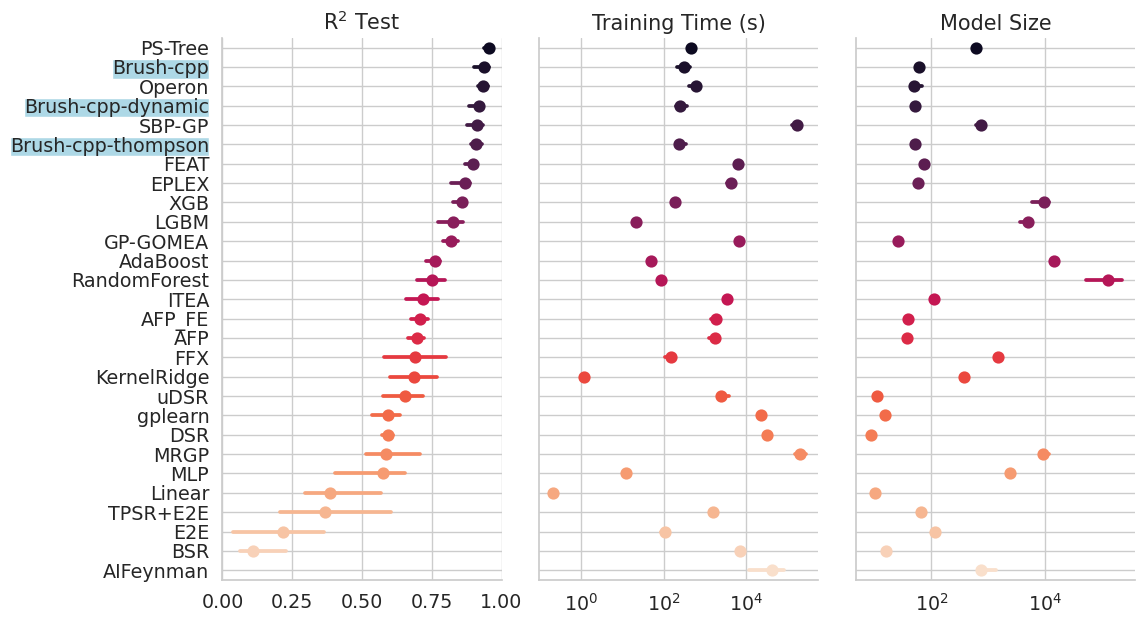

In [13]:
# Make the PairGrid
sns.set(font_scale=1.25, style='whitegrid')
# sns.set(palette='magma')
sns.despine(left=True, bottom=True)

df_plot=df_sum.copy()

df_plot['*algorithm*'] = df_plot['algorithm'].apply(lambda x: '*'+x if x in symbolic_algs else x)

# different options
x_vars=[
#         'r2_test_norm',
        'r2_test',
#         'r2_test_rank',
#        'rmse_test',
       'training time (s)',
#         'log_mse_test',
        'model_size',
#         'model_size_rank',
]
order = df_plot.groupby('algorithm')[x_vars[0]].median().sort_values(
                    ascending='r2' not in x_vars[0] or 'rank' in x_vars[0]).index

# order = order[:10].tolist()
# order += ['TPSR+E2E', 'E2E', 'uDSR', 'DSR']

print(order)

display(df_plot[x_vars])
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, # 3.75, 
                 aspect=0.6, # 1.25,
                  hue="algorithm",
                  hue_order=order,
                  palette=sns.color_palette("rocket", n_colors=len(order)),
#                  hue='symbolic_dataset'
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      hue_order=order,
      palette=sns.color_palette("rocket", n_colors=len(order)),
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for i, (ax, title) in enumerate(zip(g.axes.flat, titles)):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([0,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)
    
    for ticklbl in ax.yaxis.get_ticklabels():
        if "Brush" in ticklbl.get_text():
            ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0.1)) # boxstyle='round',
            # ticklbl.set_c('blue')

    # Draw a reference line on baseline
    # unif = (df_plot[ df_plot['algorithm']=='Brush+SM'])[x_vars[i]].median()
    # ax.axvline(x=unif, ymin=0.025, ymax=0.975, color='gray', ls='--', zorder=-999)


save(name='_'.join(['pairgrid-pointplot']+x_vars))

Index(['E2E', 'Brush-cpp-thompson', 'Brush-cpp-dynamic', 'Brush-cpp',
       'PS-Tree', 'TPSR+E2E', 'uDSR', 'DSR'],
      dtype='object', name='algorithm')


,training time (s)
585,159.900392
586,229.043192
587,184.077010
588,211.023498
589,138.945925
...,...
3308,2021.250424
3309,3536.686073
3310,1750.071732
3311,1522.833032


saving ../paper//pairgrid-pointplot_training-time-(s).pdf


<Figure size 640x480 with 0 Axes>

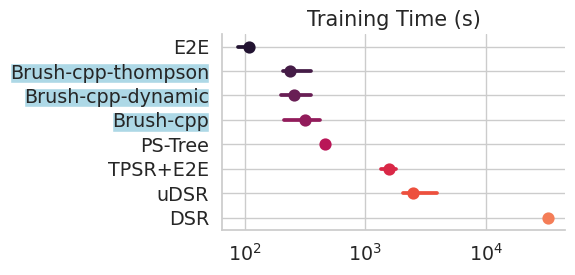

In [14]:
# Make the PairGrid
sns.set(font_scale=1.25, style='whitegrid')
# sns.set(palette='magma')
sns.despine(left=True, bottom=True)

df_plot=df_sum.copy()

df_plot = df_plot[df_plot["algorithm"].isin([
    'Brush_0',
    'Brush+S',
    'Brush+M',
    'Brush+SM',

    "Brush (C-D-UCB1)",
    "Brush (D-TS)",
    "Brush (C-D-TS)",

    "Brush",
    "Brush (D-UCB1)",
    "Brush wo split",
    "Brush wo split (D-UCB1)",

    'Brush w/ split (no MAB)',
    'Brush w/o split (no MAB)',
    'Brush w/o split (D-UCB1)',

    'Brush w/ split (D-UCB1)',
    'Brush w/ split (C-D-UCB1)',
    'Brush w/ split (D-TS)',
    'Brush w/ split (C-D-TS)',

    "uDSR",
    "DSR",
    "E2E",
    "TPSR+E2E",
    "PS-Tree",
    "NeSymRes 10M",
    "NeSymRes 100M",
] + [a for a in df_plot["algorithm"].unique() if "Brush" in a])]

df_plot['*algorithm*'] = df_plot['algorithm'].apply(lambda x: '*'+x if x in symbolic_algs else x)

# different options
x_vars=[
#         'r2_test_norm',
#        'r2_test',
#         'r2_test_rank',
#       'rmse_test',
#         'log_mse_test',
#        'model_size',
#         'model_size_rank',
       'training time (s)',
]
order = df_plot.groupby('algorithm')[x_vars[0]].median().sort_values(
                    ascending='r2' not in x_vars[0] or 'rank' in x_vars[0]).index

print(order)

display(df_plot[x_vars])
g = sns.PairGrid(df_plot, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=3, 
                 aspect=2,
                  hue="algorithm",
                  hue_order=order,
                  palette=sns.color_palette("rocket", n_colors=10),
#                  hue='symbolic_dataset'
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      hue_order=order,
      palette=sns.color_palette("rocket", n_colors=10),
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      ci=95
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)
    
    for ticklbl in ax.yaxis.get_ticklabels():
        if "Brush" in ticklbl.get_text():
            ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0.1)) # boxstyle='round',
            # ticklbl.set_c('blue')

save(name='_'.join(['pairgrid-pointplot']+x_vars))

## effect of friedman datasets

['PS-Tree', 'Operon', 'Brush-cpp', 'SBP-GP', 'Brush-cpp-dynamic', 'Brush-cpp-thompson', 'FEAT', 'XGB', 'EPLEX', 'LGBM', 'TPSR+E2E', 'E2E', 'uDSR', 'DSR']


/home/ch246537/.conda/envs/srbench/lib/python3.9/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.87199254, 0.3633634, 0.35974223)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


saving ../paper//friedman_comparison_pairgrid-pointplot_normalized_R2_test.pdf


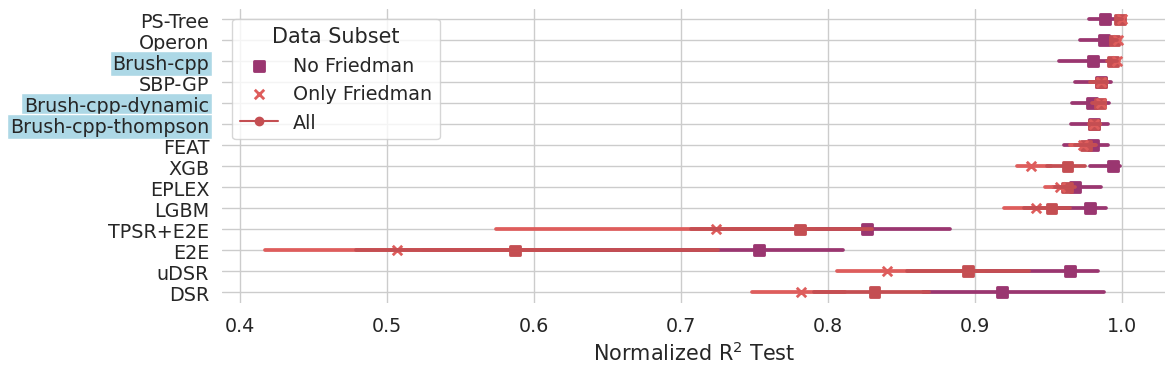

In [15]:
# Make the PairGrid
sns.set_style("whitegrid")
df_plot=df_sum.copy()
df_plot['*algorithm*'] = df_plot['algorithm'].apply(lambda x: '*'+x if x in symbolic_algs else x)
df_plot = df_plot[['algorithm','r2_test','r2_test_norm','r2_test_rank','friedman_dataset']]

x='r2_test'
markers = ['o','s','x']
colors = sns.color_palette('flare',n_colors=3)
for x in ['r2_test_norm']:
    h = plt.figure(figsize=(12,4))
    ax = plt.gca()
    order = df_plot.groupby('algorithm')[x].median().sort_values(
                    ascending='r2' not in x or 'rank' in x).index[:10].tolist() # Change here to show only topN individuals
    
    order += ['TPSR+E2E', 'E2E', 'uDSR', 'DSR']
    print(order)
    i = 0
    axes = []
    g = sns.pointplot(ax=ax,
                  data=df_plot,
                  x=x,
                  y='algorithm',
                  hue='friedman_dataset',
                  #size=10,
                  orient="h",
                  order=order,
                  markers=['s','x'],
                  palette="flare_r",
                  join=False,
                  estimator=np.median,
                  #legend_out=True
                 )
    # all PMLB
    g2 = sns.pointplot(ax=ax,
                  data=df_plot,
                  x=x,
                  y='algorithm',
#                   hue='friedman_dataset',
                  #size=10,
                  orient="h",
                  order=order,
                  color='r',
#                   palette="flare_r",
                  join=False,
                  estimator=np.median,
                  markers = 's',
                  #legend_out=True
                 )
    # add all PMLB to legend
    handles, labels = ax.get_legend_handles_labels()
    #Create custom artists
    both = plt.Line2D((0,1),(0,0), color='r', marker='o', linestyle='-', label='All')
    handles.append(both)
    plt.legend(title='Data Subset',
               handles=handles, 
               labels=['No Friedman','Only Friedman','All'])
    
    if x=='r2_test':
        plt.xlim([-.5,1.0])
    if 'norm' in x:
        x='normalized_R2_test'
    sns.despine(left=True, bottom=True)
#         plt.title(prefix.replace('_',' ').title())
    axes.append(ax)
    i+=1
    plt.tight_layout()
    for ax in axes:
        ax.set_ylabel('')
        ax.set_xlabel(x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$'))
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)

        for ticklbl in ax.yaxis.get_ticklabels():
            if "Brush" in ticklbl.get_text():
                ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=2)) # boxstyle='round',
                # ticklbl.set_c('blue')

    save(name='friedman_comparison_'+'_'.join(['pairgrid-pointplot']+[x]))

# training time versus dataset size

In [16]:
check_time = False
if check_time:
    import pandas as pd
    # for dataset, dfg in df_sum.groupby('dataset'):
    def get_size(dataset,i):
        df = pd.read_csv(datadir+dataset+'/'+dataset+'.tsv.gz',sep='\t') 
        return df.shape[i]

    df_sum.loc[:,'dataset_nsamples'] = df_sum['dataset'].apply(lambda x: get_size(x,0))
    df_sum.loc[:,'dataset_nsamples_train'] = df_sum['dataset'].apply(lambda x: min(get_size(x,0),10000))
    df_sum.loc[:,'dataset_nfeatures'] = df_sum['dataset'].apply(lambda x: get_size(x,1))
    df_sum.loc[:,'dataset_npoints'] = df_sum['dataset_nsamples']*df_sum['dataset_nfeatures']
    df_sum

In [17]:
if check_time:
    df_sum.algorithm.unique()

In [18]:
if check_time:

    df_sum['Method Family'] = df_sum['algorithm'].apply(lambda x: 'Operon' if x=='Operon' else 'XGB' if x=='XGB' else 'Other Non-GP SR' if x in nongp_algs else 'Other GP SR' if x in gp_algs else 'Other ML')

    order = [
        # 'FEAT SD-Split',
        # # 'FEAT S-Split',
        # 'FEAT D-Split',
        # 'FEAT(e-lex)',

        'B-wo-split',
        'Baseline',
        'Baseline-500',
        "C-D-UCB1",
        "C-D-UCB1-500",
        "C-D-TS",
        "D-UCB1",
        "D-TS",
    ]

    marker_choice = {
        # "FEAT S-Split"  : '<',
        # # "FEAT SD-Split"  : '*',
        # "FEAT D-Split"  : 'o',
        # "FEAT(e-lex)" : 's',

        'B-wo-split' : 's',
        'Baseline' : '*',
        'Baseline-500' : 'o',
        "C-D-UCB1" : '<',
        "C-D-UCB1-500" : '>',
        "C-D-TS" : '>',
        "D-UCB1" : 's',
        "D-TS" : 'o',
    }

    for col in ['dataset_nsamples_train','dataset_nsamples','dataset_nfeatures','dataset_npoints']:
        sns.set(palette='tab20')
        sns.set_style('whitegrid')
        sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 1.5})

        plt.figure(figsize=(6,6))
        ax = sns.lineplot(
            data=df_sum.loc[df_sum.algorithm.isin([
                #'Operon',
                # 'FEAT SD-Split',
                # 'FEAT S-Split',
                # 'FEAT D-Split',
                # 'FEAT(e-lex)',
                #'EPLEX',
                #'SBP-GP',
                #'XGB',
                #'DSR',

                'B-wo-split',
                'Baseline',
                'Baseline-500',
                "C-D-UCB1",
                "C-D-UCB1-500",
                "C-D-TS",
                "D-UCB1",
                "D-TS",
                ])],
            x = col,
            y = 'training time (hr)',
    #         hue='Method Family',
    #         style='Method Family',
            hue='algorithm',
            hue_order=order,
            style='algorithm',
            markers=marker_choice,
            markersize=8,
            markerfacecolor=None,
            err_style='bars',
            alpha=0.85
    #         facecolors=None
    #         scatter_kws = {'facecolors':'none'}
        )
        ax.set_yscale('log')
        ax.set_xscale('log')
    #     plt.legend(loc=[1.01,0])
        plt.xlabel(col.replace('_',' ').title())
        plt.ylabel('Training Time (hr)')
        save('training_time_'+col)

<!-- # scores on symbolic datasets (prelim) -->

# Pareto plot

Plot the method results as trade-offs between accuracy and simplicity

In [19]:
np.random.seed(42)
def bootstrap(val, n = 1000, fn=np.mean):
    val_samples = []
    for i in range(n):
        sample = np.random.randint(0,len(val)-1, size=len(val))
        val_samples.append( fn(val[sample]) )
    m = np.mean(val_samples)
    sd = np.std(val_samples)
    ci_upper  = np.quantile(val_samples,0.95)
    ci_lower  = np.quantile(val_samples,0.05)
    return m, sd, ci_upper,ci_lower

/tmp/ipykernel_3314807/1092762565.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pareto_data = data.groupby('algorithm').median()


PF: [8, 27, 13, 7, 5, 21]
PF: [17, 0, 1, 6, 20]
PF: [26, 10, 11, 23]
PF: [4, 24, 14, 15, 16, 25]
PF: [9, 12, 18, 3]
AFP 17.0 7.0
AFP_FE 17.0 7.0
AIFeynman 27.0 20.0
AdaBoost 15.0 25.0
BSR 25.0 4.0
Brush-cpp 3.0 13.0
Brush-cpp-dynamic 7.0 10.5
Brush-cpp-thompson 7.0 10.0
DSR 20.0 2.0
E2E 25.0 17.0
EPLEX 11.0 12.0
FEAT 8.0 14.75
FFX 16.0 21.0
GP-GOMEA 12.0 6.0
ITEA 15.0 16.0
KernelRidge 13.0 19.0
LGBM 11.0 24.0
Linear 21.0 2.5
MLP 15.5 23.0
MRGP 19.0 26.0
Operon 4.0 13.0
PS-Tree 2.5 19.0
RandomForest 15.0 28.0
SBP-GP 6.0 20.0
TPSR+E2E 22.0 13.0
XGB 9.5 25.0
gplearn 21.0 4.0
uDSR 15.75 3.0
saving ../paper//pareto_plot_r2_test_rank_model_size_rank.pdf


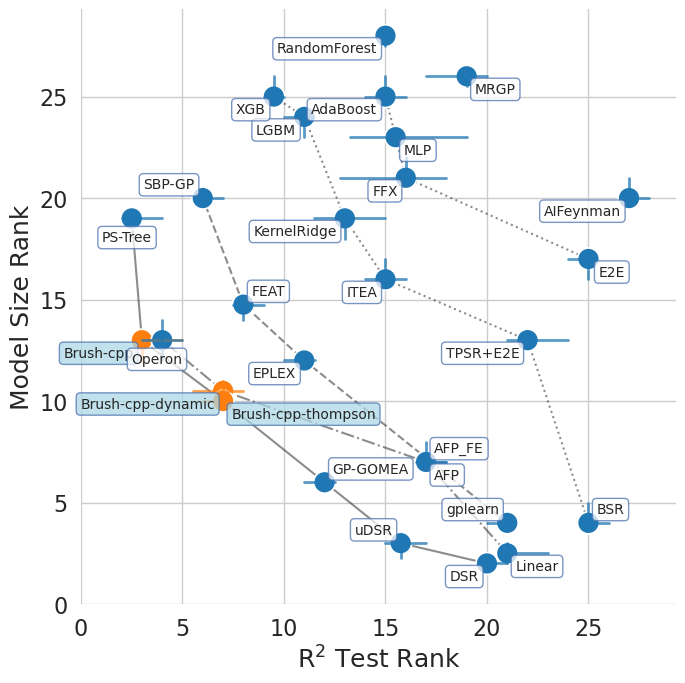

In [20]:
import pdb
from pareto_utils import front
sns.set(font_scale=1, style='whitegrid')
labelsize=18
plt.figure(figsize=(7,7))
data = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]
data['*algorithm*'] = data['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)
xcol = 'r2_test_rank'
# xcol  = 'r2_test'
ycol = 'model_size_rank'
# ycol = 'model_size'
palette = 'viridis'
# outline pareto front
pareto_data = data.groupby('algorithm').median()
pareto_data['is brush'] = pareto_data.index.str.contains("Brush")

objs = pareto_data[[xcol,ycol]].values
# reverse R2 (objs are minimized)
# objs[:,0] = -objs[:,0]
levels = 5 # Change here to include or exclude models
styles=['-','-.','--',':', ':', ':', ':', ':', ':']
PFs = []
pareto_ranks = -np.ones(len(pareto_data))
for el in range(levels):
#     pdb.set_trace()
    PF = front(objs[:,0],objs[:,1])
    if len(PF)>0:
        print('PF:',PF)
        pareto_ranks[PF] = el
    objs[PF,:] = np.inf
    PFs.append(PF)
i = 0
pareto_data.loc[:,'pareto_rank'] = pareto_ranks
for pfset in PFs:
    xset,yset = [],[]

    for pf in pfset:
        xset.append(pareto_data[xcol].values[pf])
        yset.append( pareto_data[ycol].values[pf] )
    linestyle=styles[i]
    plt.plot(xset,yset, styles[i]+'k', alpha=0.5, zorder=1)
#     plt.gca().set_zorder(10)
    i+=1

cmap = sns.color_palette(palette='tab10',  # pallete,
                         # n_colors=pareto_data.pareto_rank.nunique(), 
                         n_colors=2, 
                         desat=None, 
                         as_cmap=False)

ax = sns.scatterplot(
    ax = plt.gca(),
#     ax = g.ax_joint,
#     data = data.groupby('algorithm').median(),
    data = pareto_data,
    x = xcol,
    y = ycol,
#     style='algorithm',
#     style='pareto_rank',
    hue = 'is brush', # 'pareto_rank',
    s=250,
#     palette=palette,
    #     edgecolor='k'
    legend=False,
    palette=cmap
)
ax.set_zorder(2)
xoff = .4
yoff = 0.3
# xoff, yoff = 0, 0
for idx,row in pareto_data.iterrows():
    x=row[xcol]-xoff
    y=row[ycol]-yoff
    ha='right'
    
    if idx in ['Linear', 'AFP', 'MLP','MRGP', 'Brush-cpp-thompson']: #  '$Brush_0$' ,'Brush+M', ,"Brush (C-D-TS)*"   "Brush wo split*", "Brush (C-D-UCB1)*", "Brush (D-UCB1)*",
        x=row[xcol]+xoff
        ha='left'
    elif idx in ['Operon', 'PS-Tree',"Brush wo split (D-UCB1)"]: # '$Brush_0$',
        x = row[xcol]+1
        y -= yoff
    elif idx  in ['uDSR','B-wo-split', 'SBP-GP', 'Brush', "Brush+M (C-D-UCB1)", 'Brush+SM',]: # 'Baseline*', 
        #x = row[xcol]+1
        y = row[ycol]+1
    elif idx in ['gplearn']:
#         x -= xoff
#         x=row[xcol]+xoff
        y = row[ycol]+1
#         ha='left'
    elif idx in []: # 
        x=row[xcol]+xoff 
        y = row[ycol]+1
    elif idx in ['FEAT', 'GP-GOMEA', 'FEAT S-Split', 'AFP_FE',  'BSR',  "gplearn",]: # "Brush (D-UCB1)*",
#         x -= xoff
        x=row[xcol]+xoff
        y = row[ycol]+1
        # if idx == 'GP-GOMEA*':
        #     x=row[xcol] -0.75
        #     y += 0.5
        ha='left'
    elif idx in ['E2E', 'NeSymRes 10M', "D-TS", ]: #, 'DSR*', 'D-UCB1*',  "Brush*"  "GP-GOMEA*", 
        ha='left'
        x = row[xcol]+0.5
        
    facecolor = 'w'
    if "Brush" in idx:
        facecolor = 'lightblue'

    plt.text(s=idx,
             x = x, 
             y = y,
             fontsize=10,
             ha=ha,
             va='top',
             bbox=dict(facecolor=facecolor, edgecolor='b', boxstyle='round', alpha=0.75)
            )
    
# confidence intervals
i = 0
for alg, dg in data.groupby('algorithm'):
    x = dg[xcol].median() 
    y = dg[ycol].median()
    _, sdx, ciux, cilx = bootstrap(dg[xcol].values, fn=np.median, n=1000)
    _, sdy, ciuy, cily = bootstrap(dg[ycol].values, fn=np.median, n=1000)
    print(alg, x, y)
    plt.plot(
             [cilx,ciux],
             [y, y],
             alpha=0.75,
             lw=2,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    plt.plot(
             [x, x],
             [cily,ciuy],
             alpha=0.75,
             lw=2,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    i += 1
    
ax.set_aspect(1.0)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ticksize=16
plt.xticks([0,5,10,15,20,25],fontsize=ticksize)
plt.yticks([0,5,10,15,20,25],fontsize=ticksize)
# ax.set_yscale('log')
plt.xlabel(xcol.replace('_',' ').replace('r2','$R^2$').title(), fontsize=labelsize)
plt.ylabel(ycol.replace('_',' ').title(), fontsize=labelsize)
sns.despine(left=True, bottom=True)
save(name="pareto_plot_"+xcol+'_'+ycol)

/tmp/ipykernel_3314807/1444259981.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pareto_data = data[data['algorithm'] != 'Linear'].groupby('algorithm').median()


PF: [15, 16, 24, 7, 5, 20]
PF: [17, 3, 6, 19]
PF: [21, 10, 11, 22]
PF: [9, 12, 26, 14, 13]
PF: [23, 0]
AFP 17.0 1783.2957089543343
AFP_FE 17.0 1829.5131447315216
AIFeynman 27.0 42842.21329188347
AdaBoost 15.0 47.922410786151886
BSR 25.0 7200.007610917091
Brush-cpp 3.0 318.16093480587006
Brush-cpp-dynamic 7.0 254.40122663974762
Brush-cpp-thompson 7.0 236.49454927444458
DSR 20.0 32615.11300331354
E2E 25.0 108.61738801002502
EPLEX 11.0 4297.035191595554
FEAT 8.0 6250.729626893997
FFX 16.0 147.70063120126724
GP-GOMEA 12.0 6620.086624860764
ITEA 15.0 3554.4253093600273
KernelRidge 13.0 1.1532334685325623
LGBM 11.0 20.992564022541046
MLP 15.5 12.30481082201004
MRGP 19.0 200748.5651602745
Operon 4.0 622.5887185335159
PS-Tree 2.5 462.23905140161514
RandomForest 15.0 83.63586246967316
SBP-GP 6.0 169928.58595365286
TPSR+E2E 22.0 1576.371304988861
XGB 9.5 188.729117333889
gplearn 21.0 23148.80387175083
uDSR 15.75 2483.855812191963
saving ../paper//pareto_plot_r2_test_rank_training-time-(s).pdf


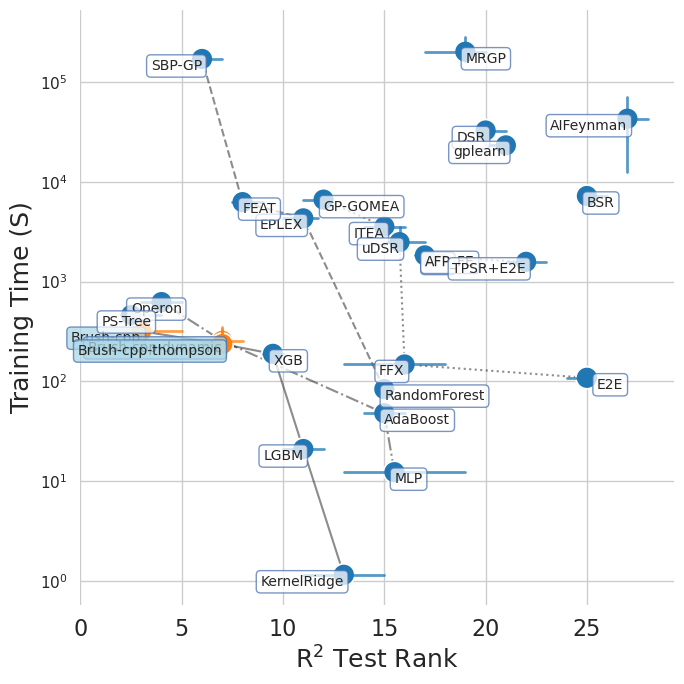

In [21]:
import pdb
from pareto_utils import front
sns.set(font_scale=1, style='whitegrid')
labelsize=18
plt.figure(figsize=(7,7))
data = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]
data['*algorithm*'] = data['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)
xcol = 'r2_test_rank'
# xcol  = 'r2_test'
# ycol = 'model_size_rank'
ycol = 'training time (s)'
# ycol = 'model_size'
palette = 'viridis'
# outline pareto front
 # ok we get it you can do faster but stop screwing scale
pareto_data = data[data['algorithm'] != 'Linear'].groupby('algorithm').median()
pareto_data['is brush'] = pareto_data.index.str.contains("Brush")

objs = pareto_data[[xcol,ycol]].values
# reverse R2 (objs are minimized)
# objs[:,0] = -objs[:,0]
levels = 5 # Change here to include or exclude models
styles=['-','-.','--',':', ':', ':', ':', ':', ':']
PFs = []
pareto_ranks = -np.ones(len(pareto_data))
for el in range(levels):
#     pdb.set_trace()
    PF = front(objs[:,0],objs[:,1])
    if len(PF)>0:
        print('PF:',PF)
        pareto_ranks[PF] = el
    objs[PF,:] = np.inf
    PFs.append(PF)
i = 0
pareto_data.loc[:,'pareto_rank'] = pareto_ranks
for pfset in PFs:
    xset,yset = [],[]

    for pf in pfset:
        xset.append(pareto_data[xcol].values[pf])
        yset.append( pareto_data[ycol].values[pf] )
    linestyle=styles[i]
    plt.plot(xset,yset, styles[i]+'k', alpha=0.5, zorder=1)
#     plt.gca().set_zorder(10)
    i+=1

cmap = sns.color_palette(palette='tab10', #palette, 
                         # n_colors=pareto_data.pareto_rank.nunique(), 
                         n_colors=2, 
                         desat=None, 
                         as_cmap=False)

ax = sns.scatterplot(
    ax = plt.gca(),
#     ax = g.ax_joint,
#     data = data.groupby('algorithm').median(),
    data = pareto_data,
    x = xcol,
    y = ycol,
#     style='algorithm',
#     style='pareto_rank',
    hue = 'is brush', # 'pareto_rank',
    s=250,
#     palette=palette,
    #     edgecolor='k'
    legend=False,
    palette=cmap
)
ax.set_zorder(2)
xoff = 0 #.4
yoff = 0 #.3
# xoff, yoff = 0, 0
for idx,row in pareto_data.iterrows():
    x=row[xcol]-xoff
    y=row[ycol]-yoff
    ha='right'
    va='top'
    
    if idx in ['Linear', 'AFP', 'MLP','MRGP',]: # ,"Brush (C-D-TS)*"   "Brush wo split*", "Brush (C-D-UCB1)*", "Brush (D-UCB1)*",
        x=row[xcol]+xoff
        ha='left'
    elif idx in ['Operon', 'PS-Tree',"Brush wo split (D-UCB1)"]: # '$Brush_0$',
        x = row[xcol]+1
        y -= yoff
    elif idx  in ['uDSR','B-wo-split', 'SBP-GP', 'Brush', "Brush+M (C-D-UCB1)",]: # 'Baseline*', 
        #x = row[xcol]+1
        y = row[ycol]+1
    elif idx in ['gplearn']:
#         x -= xoff
#         x=row[xcol]+xoff
        y = row[ycol]+1
#         ha='left'
    elif idx in []: # 
        x=row[xcol]+xoff 
        y = row[ycol]+1
    elif idx in ['FEAT', 'GP-GOMEA', 'FEAT S-Split', 'AFP_FE',  'BSR',  "gplearn",]: # "Brush (D-UCB1)*",
#         x -= xoff
        x=row[xcol]+xoff
        y = row[ycol]+1
        # if idx == 'GP-GOMEA*':
        #     x=row[xcol] -0.75
        #     y += 0.5
        ha='left'
    elif idx in ['E2E', 'NeSymRes 10M', "D-TS", ]: #, 'DSR*', 'D-UCB1*',  "Brush*"  "GP-GOMEA*", 
        ha='left'
        x = row[xcol]+0.5
    elif idx in [ 'Brush+SM',  'Brush+S',   ]:
        ha='left'
        va = 'bottom'
    elif idx in [ 'XGB',  '$Brush_0$', 'RandomForest', 'AdaBoost']:
        ha='left'
        va = 'top'
        if idx == 'XGB':
            ha='right'
            x += 1.5
    
    if idx == 'Brush+M':
        # ha='right'
        x -= 0.5
        
    facecolor = 'w'
    if "Brush" in idx:
        facecolor = 'lightblue'

    plt.text(s=idx,
             x = x, 
             y = y,
             fontsize=10,
             ha=ha,
             va=va,
             bbox=dict(facecolor=facecolor, edgecolor='b', boxstyle='round', alpha=0.75)
            )
    
# confidence intervals
i = 0
for alg, dg in data.groupby('algorithm'):
    if alg == 'Linear': continue
    x = dg[xcol].median() 
    y = dg[ycol].median()
    _, sdx, ciux, cilx = bootstrap(dg[xcol].values, fn=np.median, n=1000)
    _, sdy, ciuy, cily = bootstrap(dg[ycol].values, fn=np.median, n=1000)
    print(alg, x, y)
    plt.plot(
             [cilx,ciux],
             [y, y],
             alpha=0.75,
             lw=2,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    plt.plot(
             [x, x],
             [cily,ciuy],
             alpha=0.75,
             lw=2,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    i += 1
    
# ax.set_aspect(1.0)
ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ticksize=16
plt.xticks([0,5,10,15,20,25],fontsize=ticksize)
# plt.yticks([0,5,10,15,20,25],fontsize=ticksize)
ax.set_yscale('log')
plt.xlabel(xcol.replace('_',' ').replace('r2','$R^2$').title(), fontsize=labelsize)
plt.ylabel(ycol.replace('_',' ').title(), fontsize=labelsize)
sns.despine(left=True, bottom=True)
save(name="pareto_plot_"+xcol+'_'+ycol)

/tmp/ipykernel_3314807/2656730584.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pareto_data = data.groupby('algorithm').median()


,random_state,training time (s),mse_test,mae_test,r2_test,model_size,training time (hr),r2_zero_test,friedman_dataset,symbolic_alg,...,r2_test_norm,model_size_rank,model_size_norm,r2_zero_test_rank,r2_zero_test_norm,rmse_test_rank,rmse_test_norm,log_mse_test_rank,log_mse_test_norm,is brush
algorithm,,,,,,,,,,,,,,,,,,,,,
AFP,13879.5,1783.295709,0.438313,0.519851,0.695354,36.50,0.495360,0.695354,1.0,1.0,...,0.885871,7.00,0.000185,17.00,0.750435,17.00,0.248004,17.00,0.210481,False
AFP_FE,13879.5,1829.513145,0.430157,0.518399,0.709005,37.75,0.508198,0.709005,1.0,1.0,...,0.883387,7.00,0.000180,17.00,0.751583,17.00,0.248659,17.00,0.200855,False
AIFeynman,13879.5,42842.213292,2.897746,1.202983,-0.437132,742.00,11.900615,0.000000,1.0,1.0,...,0.000000,20.00,0.006515,26.50,0.000000,27.00,1.000000,27.00,1.000000,False
AdaBoost,13879.5,47.922411,0.350307,0.459370,0.759914,14668.50,0.013312,0.759914,1.0,0.0,...,0.913765,25.00,0.061324,15.00,0.799952,15.00,0.210642,15.00,0.165502,False
BSR,13879.5,7200.007611,0.996942,0.806952,0.109722,16.00,2.000002,0.109722,1.0,1.0,...,0.595372,4.00,0.000092,26.00,0.077777,25.00,0.576421,25.00,0.547437,False
Brush-cpp,16322.5,318.160935,0.077602,0.217075,0.938743,59.50,0.088378,0.938743,1.0,0.0,...,0.993829,13.00,0.000448,3.00,0.986491,3.00,0.021508,3.00,0.016032,True
Brush-cpp-dynamic,16322.5,254.401227,0.103016,0.250518,0.919312,51.50,0.070667,0.919312,1.0,0.0,...,0.984866,10.50,0.000367,7.00,0.963540,6.50,0.049766,6.50,0.033287,True
Brush-cpp-thompson,16322.5,236.494549,0.106433,0.256797,0.908327,50.50,0.065693,0.908327,1.0,0.0,...,0.980828,10.00,0.000362,7.00,0.961032,7.00,0.053196,7.00,0.039213,True
DSR,13879.5,32615.113003,0.502131,0.564958,0.591536,8.50,9.059754,0.591536,1.0,1.0,...,0.831380,2.00,0.000003,20.00,0.618219,20.00,0.351669,20.00,0.282524,False


PF: [7, 26, 12, 19, 4, 20]
PF: [16, 25, 0, 1, 6, 5]
AFP 0.6953538991447503 36.5
AFP_FE 0.7090053482676721 37.75
Brush-cpp 0.9387425484986462 59.5
Brush-cpp-dynamic 0.9193118350340824 51.5
Brush-cpp-thompson 0.9083265263215341 50.5
DSR 0.5915363488850844 8.5
GP-GOMEA 0.8204368163886107 25.25
Linear 0.38368413569813875 10.0
Operon 0.9343873312186631 50.0
PS-Tree 0.9536731159948553 612.25
gplearn 0.5936104039947055 15.0
uDSR 0.6540120329897263 10.75


/tmp/ipykernel_3314807/2656730584.py:207: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pareto_data = data.groupby('algorithm').median()


,random_state,training time (s),mse_test,mae_test,r2_test,model_size,training time (hr),r2_zero_test,friedman_dataset,symbolic_alg,...,model_size_rank,model_size_norm,r2_zero_test_rank,r2_zero_test_norm,rmse_test_rank,rmse_test_norm,log_mse_test_rank,log_mse_test_norm,is brush,pareto_rank
algorithm,,,,,,,,,,,,,,,,,,,,,
AFP,13879.5,1783.295709,0.438313,0.519851,0.695354,36.50,0.495360,0.695354,1.0,1.0,...,7.00,0.000185,17.00,0.750435,17.00,0.248004,17.00,0.210481,False,1.0
AFP_FE,13879.5,1829.513145,0.430157,0.518399,0.709005,37.75,0.508198,0.709005,1.0,1.0,...,7.00,0.000180,17.00,0.751583,17.00,0.248659,17.00,0.200855,False,1.0
AdaBoost,13879.5,47.922411,0.350307,0.459370,0.759914,14668.50,0.013312,0.759914,1.0,0.0,...,25.00,0.061324,15.00,0.799952,15.00,0.210642,15.00,0.165502,False,-1.0
BSR,13879.5,7200.007611,0.996942,0.806952,0.109722,16.00,2.000002,0.109722,1.0,1.0,...,4.00,0.000092,26.00,0.077777,25.00,0.576421,25.00,0.547437,False,-1.0
Brush-cpp,16322.5,318.160935,0.077602,0.217075,0.938743,59.50,0.088378,0.938743,1.0,0.0,...,13.00,0.000448,3.00,0.986491,3.00,0.021508,3.00,0.016032,True,0.0
Brush-cpp-dynamic,16322.5,254.401227,0.103016,0.250518,0.919312,51.50,0.070667,0.919312,1.0,0.0,...,10.50,0.000367,7.00,0.963540,6.50,0.049766,6.50,0.033287,True,1.0
Brush-cpp-thompson,16322.5,236.494549,0.106433,0.256797,0.908327,50.50,0.065693,0.908327,1.0,0.0,...,10.00,0.000362,7.00,0.961032,7.00,0.053196,7.00,0.039213,True,1.0
DSR,13879.5,32615.113003,0.502131,0.564958,0.591536,8.50,9.059754,0.591536,1.0,1.0,...,2.00,0.000003,20.00,0.618219,20.00,0.351669,20.00,0.282524,False,0.0
E2E,16322.5,108.617388,1.255669,0.851145,0.218149,117.50,0.030171,0.218149,1.0,0.0,...,17.00,0.000838,25.00,0.252270,25.00,0.585045,25.00,0.568289,False,-1.0


Brush-cpp 0.9387425484986462 59.5
Brush-cpp-dynamic 0.9193118350340824 51.5
Brush-cpp-thompson 0.9083265263215341 50.5
GP-GOMEA 0.8204368163886107 25.25
Operon 0.9343873312186631 50.0


/tmp/ipykernel_3314807/2841818303.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  h.tight_layout()


saving ../paper//pareto_plot_r2_test_model_size.pdf


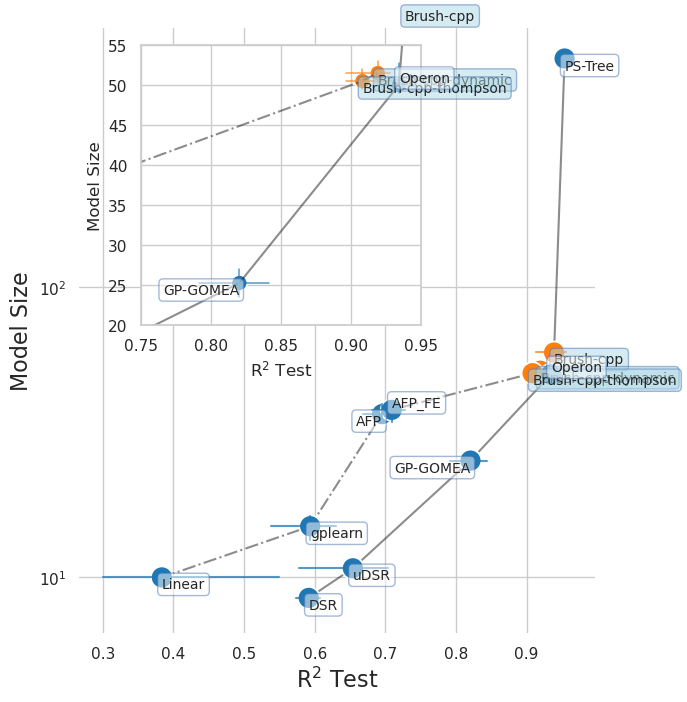

In [22]:
import pdb
from pareto_utils import front
sns.set(font_scale=1, style='whitegrid')
labelsize=16
fig, ax = plt.subplots(figsize=(7,7))
data = df_sum.copy() #.loc[df_sum.algorithm.isin(symbolic_algs)]
data['*algorithm*'] = data['algorithm'].apply(lambda x: x+'*' if x in symbolic_algs else x)
# xcol = 'r2_test_rank'
xcol  = 'r2_test'
# ycol = 'model_size_rank'
ycol = 'model_size'
palette = 'viridis'
# outline pareto front
pareto_data = data.groupby('algorithm').median()
pareto_data['is brush'] = pareto_data.index.str.contains("Brush")

display(pareto_data)
# fn_func = (pareto_data[xcol] >= 0.5) & (pareto_data[ycol] <= 100)
fn_func = (pareto_data[xcol] >= 0.0)

pareto_data = pareto_data[fn_func]

objs = pareto_data[[xcol,ycol]].values
# reverse R2 (objs are minimized)
objs[:,0] = -objs[:,0]
levels = 2 # Change here to include or exclude models
styles=['-','-.','--',':', ':', ':', ':', ':', ':']
PFs = []
pareto_ranks = -np.ones(len(pareto_data))
for el in range(levels):
#     pdb.set_trace()
    PF = front(objs[:,0],objs[:,1])
    if len(PF)>0:
        print('PF:',PF)
        pareto_ranks[PF] = el
    objs[PF,:] = np.inf
    PFs.append(PF)
i = 0
pareto_data.loc[:,'pareto_rank'] = pareto_ranks

for pfset in PFs:
    xset,yset = [],[]

    for pf in pfset:
        xset.append(pareto_data[xcol].values[pf])
        yset.append( pareto_data[ycol].values[pf] )
    linestyle=styles[i]
    plt.plot(xset,yset, styles[i]+'k', alpha=0.5, zorder=1)
#     plt.gca().set_zorder(10)
    i+=1

pareto_data = pareto_data[(pareto_data['pareto_rank']>=0) 
                          & (pareto_data['pareto_rank']<levels)]

cmap = sns.color_palette(palette='tab10',  # pallete,
                         # n_colors=pareto_data.pareto_rank.nunique(), 
                         n_colors=2, 
                         desat=None, 
                         as_cmap=False)

sns.scatterplot(
    ax = ax,
#     ax = g.ax_joint,
#     data = data.groupby('algorithm').median(),
    data = pareto_data ,
    x = xcol,
    y = ycol,
#     style='algorithm',
#     style='pareto_rank',
    hue = 'is brush', # 'pareto_rank',
    s=250,
#     palette=palette,
    #     edgecolor='k'
    legend=False,
    palette=cmap
)
ax.set_zorder(2)
# xoff = .4
# yoff = 0.03
xoff, yoff = 0, 0
flip= False
for idx,row in pareto_data.iterrows():
    x=row[xcol]-xoff
    y=row[ycol]-yoff
    ha='left'
    va='top'
    
    if idx in ['AFP_FE','Brush+SM','Operon']:
        x=row[xcol]+xoff
        #ha='right'
        va='bottom'

    if idx in ['AFP','GP-GOMEA']:
        x=row[xcol]+xoff
        ha='right'
        # va='bottom'

    if idx in ['Brush+S','EPLEX']:
        x=row[xcol]+xoff
        ha='right'
        va='bottom'

#     elif idx == 'Operon*':
#         x = row[xcol]#+1
#         y -= yoff
#     elif idx  in ['uDSR']: # 'Baseline*', 
#         #x = row[xcol]+1
#         y = row[ycol]+1
#     elif idx in ['gplearn*']:
# #         x -= xoff
# #         x=row[xcol]+xoff
#         y = row[ycol]+1
# #         ha='left'
#     elif idx in ['AFP_FE*']:
#         x=row[xcol]+xoff
#         y = row[ycol]#+1
#     elif idx in ['FEAT*','FEAT S-Split*', 'BSR*',"C-D-UCB1*",'Brush wo split*']:
# #         x -= xoff
#         x=row[xcol]+xoff
#         y = row[ycol]+4
#         ha='left'
#     elif idx in ['AFP*', 'E2E', 'NeSymRes 10M', "D-TS*", "GP-GOMEA*"]: #, 'DSR*', 'D-UCB1*', 
#         ha='left'
#         x = row[xcol]#+0.5
#     elif idx in ['B-wo-split*']:
#         ha='left'

    facecolor = 'w'
    if "Brush" in idx: #,
        facecolor = 'lightblue'

    #ha='left'
    plt.text(s=idx,
            x = x, 
            y = y,
            ha=ha,
            fontsize=10,
            va=va,
            bbox=dict(facecolor=facecolor, edgecolor='b', boxstyle='round', alpha=.5)
            )
    
# confidence intervals
i = 0
for alg, dg in data.groupby('algorithm'):
    if not alg in pareto_data[(pareto_data['pareto_rank']>=0) 
                    & (pareto_data['pareto_rank']<levels)].index:
        continue
    

    x = dg[xcol].median() 
    y = dg[ycol].median()
    print(alg, x, y)
    _, sdx, ciux, cilx = bootstrap(dg[xcol].values, fn=np.median, n=1000)
    _, sdy, ciuy, cily = bootstrap(dg[ycol].values, fn=np.median, n=1000)
    plt.plot(
             [cilx,ciux],
             [y, y],
             alpha=0.75,
             lw=1.5,
            #  color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    plt.plot(
             [x, x],
             [cily,ciuy],
             alpha=0.75,
             lw=1.5,
            #  color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    i += 1
    
# ax.set_aspect(1.0)
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
ticksize=16
# plt.xticks([0,5,10,15,20],fontsize=ticksize)
# plt.yticks([0,5,10,15,20],fontsize=ticksize)
ax.set_yscale('log')
# ax.set_xscale('log')
plt.xlabel(xcol.replace('_',' ').replace('r2','$R^2$').title(), fontsize=labelsize)
plt.ylabel(ycol.replace('_',' ').title(), fontsize=labelsize)

sns.despine(left=True, bottom=True)

ax2 = plt.axes([0.2125, 0.55, .4, 0.4]) #, facecolor='lightgray')
ax2.set_zorder(3)
sns.scatterplot(
    ax=ax2,
    data = pareto_data ,
    x = xcol,
    y = ycol,
#     style='algorithm',
#     style='pareto_rank',
    hue = 'is brush', # 'pareto_rank',
    s=125,
#     palette=palette,
    #     edgecolor='k'
    legend=False,
    palette=cmap
)

ax2.set_zorder(4)

pareto_data = data.groupby('algorithm').median()
pareto_data['is brush'] = pareto_data.index.str.contains("Brush")
pareto_data = pareto_data[fn_func]
pareto_data.loc[:,'pareto_rank'] = pareto_ranks
display(pareto_data)
i=0
for pfset in PFs:
    xset,yset = [],[]

    for pf in pfset:
        xset.append(pareto_data[xcol].values[pf])
        yset.append( pareto_data[ycol].values[pf] )
    linestyle=styles[i]
    plt.plot(xset,yset, styles[i]+'k', alpha=0.5, zorder=2)
#     plt.gca().set_zorder(10)
    i+=1

i = 0
for alg, dg in data.groupby('algorithm'):
    if not ("Brush" in alg or alg in ['Operon', 'GP-GOMEA']):
        continue

    x = dg[xcol].median() 
    y = dg[ycol].median()
    print(alg, x, y)
    # display(dg)
    _, sdx, ciux, cilx = bootstrap(dg[xcol].values, fn=np.median, n=1000)
    _, sdy, ciuy, cily = bootstrap(dg[ycol].values, fn=np.median, n=1000)
    plt.plot(
             [cilx,ciux],
             [y, y],
             alpha=0.75,
             lw=1.1,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    plt.plot(
             [x, x],
             [cily,ciuy],
             alpha=0.75,
             lw=1.1,
             # color=cmap[int(pareto_data.loc[alg,'pareto_rank'])]
             color=cmap[1 if pareto_data.loc[alg,'is brush'] else 0]
#              color='b'
            )
    i += 1
    
for idx,row in pareto_data.iterrows():
    x=row[xcol]-xoff
    y=row[ycol]-yoff
    ha='left'
    va='top'
    
    if idx in ['AFP_FE','Brush+SM','Operon']:
        x=row[xcol]+xoff
        #ha='right'
        va='bottom'

    if idx in ['AFP','GP-GOMEA']:
        x=row[xcol]+xoff
        ha='right'
        # va='bottom'

    if idx in ['Brush+S','EPLEX']:
        x=row[xcol]+xoff
        ha='right'
        va='bottom'

#     elif idx == 'Operon*':
#         x = row[xcol]#+1
#         y -= yoff
#     elif idx  in ['uDSR']: # 'Baseline*', 
#         #x = row[xcol]+1
#         y = row[ycol]+1
#     elif idx in ['gplearn*']:
# #         x -= xoff
# #         x=row[xcol]+xoff
#         y = row[ycol]+1
# #         ha='left'
#     elif idx in ['AFP_FE*']:
#         x=row[xcol]+xoff
#         y = row[ycol]#+1
#     elif idx in ['FEAT*','FEAT S-Split*', 'BSR*',"C-D-UCB1*",'Brush wo split*']:
# #         x -= xoff
#         x=row[xcol]+xoff
#         y = row[ycol]+4
#         ha='left'
#     elif idx in ['AFP*', 'E2E', 'NeSymRes 10M', "D-TS*", "GP-GOMEA*"]: #, 'DSR*', 'D-UCB1*', 
#         ha='left'
#         x = row[xcol]#+0.5
#     elif idx in ['B-wo-split*']:
#         ha='left'

    facecolor = 'w'
    if "Brush" in idx or idx in ['Operon', 'GP-GOMEA']: #,
        if "Brush" in idx:
            facecolor = 'lightblue'

        #ha='left'
        plt.text(s=idx,
                x = x, 
                y = y,
                ha=ha,
                fontsize=10,
                va=va,
                bbox=dict(facecolor=facecolor, edgecolor='b', boxstyle='round', alpha=.5)
                )
# ax2.set_title('zoom')
ax2.set_xlim([0.75, .95])
ax2.set_ylim([20, 55])
# plt.xlabel("")
# plt.ylabel("")
plt.xlabel(xcol.replace('_',' ').replace('r2','$R^2$').title(), fontsize=labelsize-4)
plt.ylabel(ycol.replace('_',' ').title(), fontsize=labelsize-4)

save(name="pareto_plot_"+xcol+'_'+ycol)

In [23]:
objs

array([[            inf,             inf],
       [            inf,             inf],
       [-7.59914190e-01,  1.46685000e+04],
       [-1.09722490e-01,  1.60000000e+01],
       [            inf,             inf],
       [            inf,             inf],
       [            inf,             inf],
       [            inf,             inf],
       [-2.18149268e-01,  1.17500000e+02],
       [-8.68189374e-01,  5.80000000e+01],
       [-8.96271801e-01,  7.52500000e+01],
       [-6.91628389e-01,  1.47450000e+03],
       [            inf,             inf],
       [-7.18884243e-01,  1.11250000e+02],
       [-6.85991261e-01,  3.75000000e+02],
       [-8.26291702e-01,  5.16750000e+03],
       [            inf,             inf],
       [-5.75879197e-01,  2.40200000e+03],
       [-5.87610435e-01,  9.21950000e+03],
       [            inf,             inf],
       [            inf,             inf],
       [-7.49981165e-01,  1.29511000e+05],
       [-9.10415732e-01,  7.38500000e+02],
       [-3.

In [24]:
pareto_data['pareto_rank']

algorithm
AFP                   1.0
AFP_FE                1.0
AdaBoost             -1.0
BSR                  -1.0
Brush-cpp             0.0
Brush-cpp-dynamic     1.0
Brush-cpp-thompson    1.0
DSR                   0.0
E2E                  -1.0
EPLEX                -1.0
FEAT                 -1.0
FFX                  -1.0
GP-GOMEA              0.0
ITEA                 -1.0
KernelRidge          -1.0
LGBM                 -1.0
Linear                1.0
MLP                  -1.0
MRGP                 -1.0
Operon                0.0
PS-Tree               0.0
RandomForest         -1.0
SBP-GP               -1.0
TPSR+E2E             -1.0
XGB                  -1.0
gplearn               1.0
uDSR                  0.0
Name: pareto_rank, dtype: float64

/tmp/ipykernel_3314807/3070250588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = data[["dataset", "algorithm", "r2_test_rank"]]\


saving ../paper//clustermap.pdf


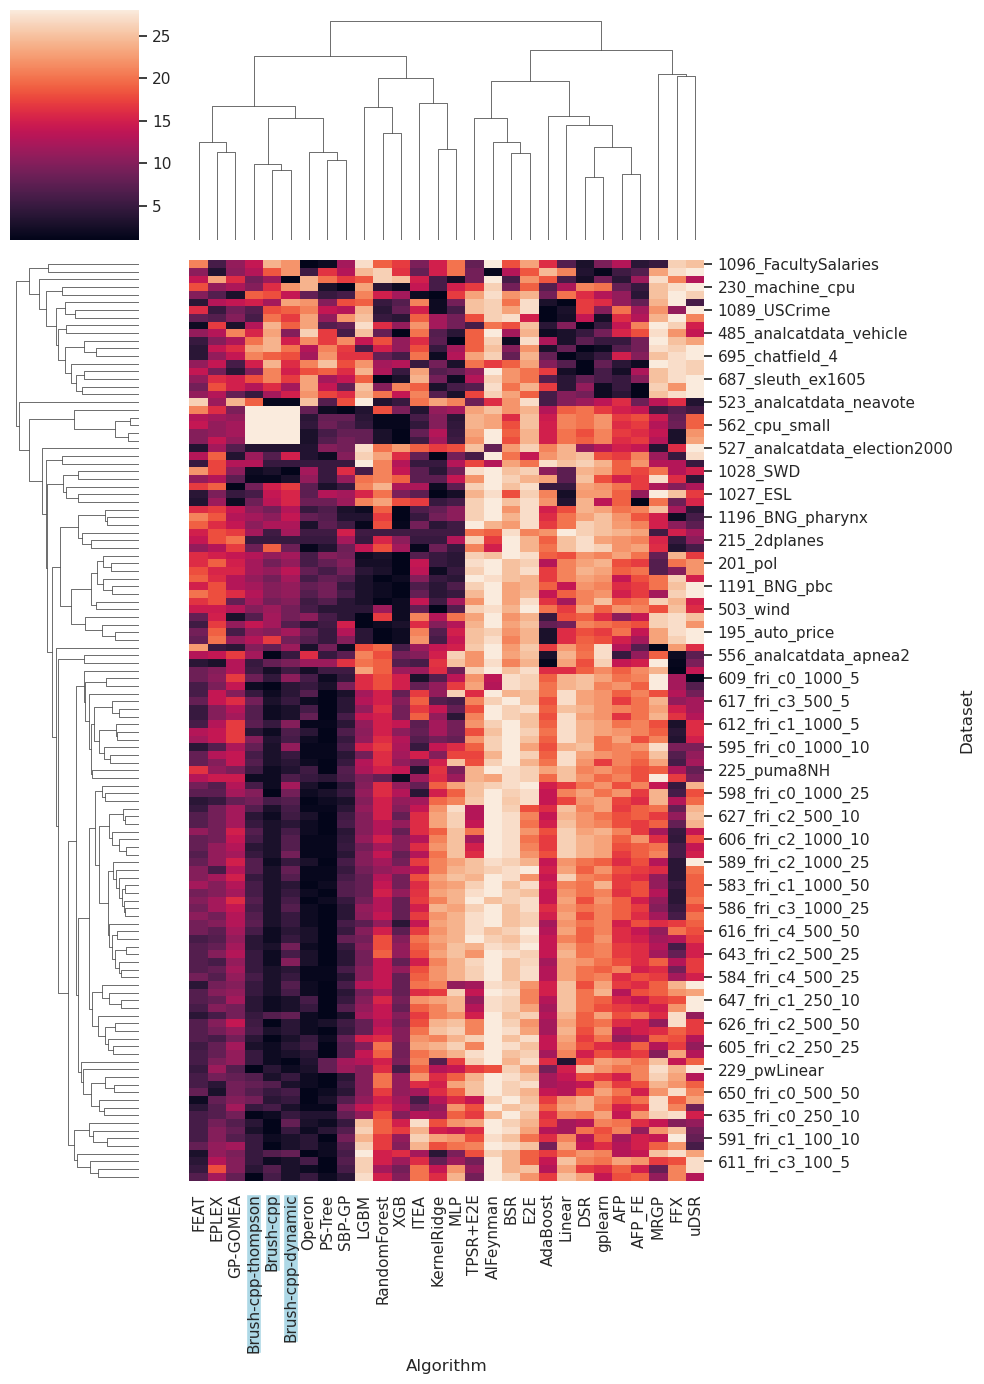

In [25]:
df_clustermap = data[["dataset", "algorithm", "r2_test_rank"]]\
        .groupby(["dataset", "algorithm"]).mean().reset_index().pivot(
            "dataset", columns="algorithm").fillna(data["algorithm"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(10, 14)
)

for ticklbl in g.ax_heatmap.xaxis.get_ticklabels():
    if "Brush" in ticklbl.get_text():
        ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
        # ticklbl.set_c('blue')

g.ax_heatmap.set_xlabel("Algorithm")
g.ax_heatmap.set_ylabel("Dataset")

plt.tight_layout()
save(name="clustermap")

/tmp/ipykernel_3314807/4142514277.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = df_clustermap[["dataset", "algorithm", "r2_test"]]\


saving ../paper//clustermap_brushes.pdf


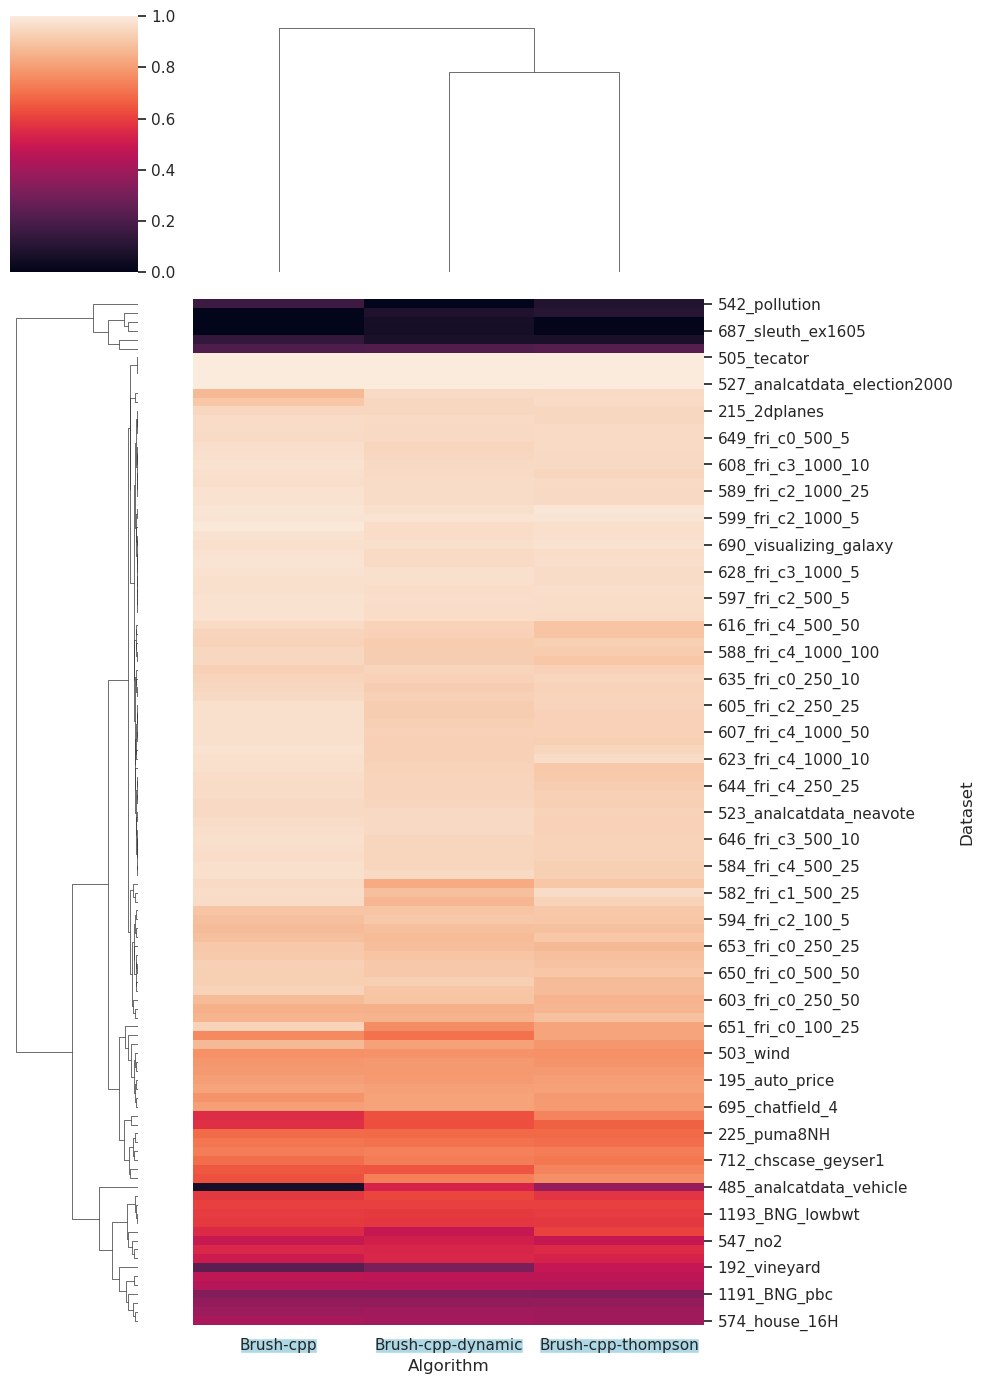

In [26]:
data_fri = data[data.dataset.str.contains("_fri_")]
data_non_fri = data[~data.dataset.str.contains("_fri_")]

df_clustermap = data[data['algorithm'].isin(['Brush+S', '$Brush_0$', 'Brush+SM', 'Brush+M']\
                                            + [a for a in df_plot["algorithm"].unique() if "Brush" in a])]

df_clustermap = df_clustermap[["dataset", "algorithm", "r2_test"]]\
        .groupby(["dataset", "algorithm"]).median().reset_index().pivot(
            "dataset", columns="algorithm").fillna(df_clustermap["algorithm"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()

g = sns.clustermap(
    df_clustermap,
    figsize=(10, 14),
    vmin=0, vmax=1.0
    #cmap=cmap  # Apply the custom colormap
)

for ticklbl in g.ax_heatmap.xaxis.get_ticklabels():
    if "Brush" in ticklbl.get_text():
        ticklbl.set_bbox(dict(facecolor='lightblue', edgecolor='w', alpha=1, pad=0)) # boxstyle='round',
        # ticklbl.set_c('blue')

g.ax_heatmap.set_xlabel("Algorithm")
g.ax_heatmap.set_ylabel("Dataset")

plt.tight_layout()
save(name="clustermap_brushes")

In [27]:
df_clustermap = data[["dataset", "*algorithm*", "r2_test_rank"]]\
        .groupby(["dataset", "*algorithm*"]).mean().reset_index().pivot("dataset", columns="*algorithm*").fillna(data["*algorithm*"].nunique())

df_clustermap.columns = df_clustermap.columns.droplevel()
# df_sum
df_clustermap

/tmp/ipykernel_3314807/236141615.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_clustermap = data[["dataset", "*algorithm*", "r2_test_rank"]]\


*algorithm*,AFP*,AFP_FE*,AIFeynman*,AdaBoost,BSR*,Brush-cpp,Brush-cpp-dynamic,Brush-cpp-thompson,DSR*,E2E,...,MLP,MRGP*,Operon*,PS-Tree,RandomForest,SBP-GP*,TPSR+E2E,XGB,gplearn*,uDSR
dataset,,,,,,,,,,,,,,,,,,,,,
1027_ESL,19.0,11.0,27.0,21.0,18.0,14.0,15.5,6.0,22.5,26.0,...,2.5,28.0,7.5,13.0,20.0,12.0,24.0,9.5,22.5,17.0
1028_SWD,19.0,17.5,28.0,10.5,25.0,3.0,1.0,2.0,24.0,26.0,...,9.0,20.0,12.0,5.0,21.0,16.0,27.0,14.0,23.0,15.0
1029_LEV,19.0,1.0,28.0,22.0,25.0,13.5,15.5,8.5,24.0,27.0,...,6.0,20.0,8.5,8.5,23.0,11.5,26.0,18.0,13.5,15.5
1030_ERA,20.0,17.0,28.0,5.0,25.0,15.0,17.0,9.0,23.0,27.0,...,7.5,12.5,7.5,3.0,24.0,5.0,26.0,12.5,22.0,12.5
1089_USCrime,20.0,12.0,26.0,1.0,23.0,18.0,19.0,7.0,17.0,27.0,...,6.0,22.0,21.0,14.0,4.0,13.0,25.0,8.0,10.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687_sleuth_ex1605,5.0,10.0,26.0,7.0,22.0,21.0,17.0,18.0,8.0,20.0,...,2.0,25.0,23.0,12.0,1.0,14.0,13.0,3.0,6.0,28.0
690_visualizing_galaxy,21.0,18.0,23.0,19.5,27.0,2.0,6.5,2.0,22.0,26.0,...,11.5,28.0,5.0,4.0,8.0,6.5,24.0,2.0,19.5,9.5
695_chatfield_4,15.0,10.0,26.0,8.0,8.0,19.0,18.0,21.0,3.0,24.0,...,13.0,25.0,12.0,22.0,8.0,16.5,23.0,6.0,5.0,28.0
